In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import matplotlib
matplotlib.rcParams['axes.grid'] = True 
%matplotlib inline

import pandas as pd

In [2]:
location = 'comtrade _meat_canada_jan_may_16.csv'

In [3]:
meat = pd.read_csv(location, dtype={'Commodity Code':str, 'Reporter Code':str})
meat.head(3)

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,HS,2016,201604,April 2016,4,0,1,Imports,124,Canada,...,NaN,NaN,NaN,NaN,321275,NaN,2768345,NaN,NaN,0
1,HS,2016,201604,April 2016,4,0,1,Imports,124,Canada,...,NaN,NaN,NaN,NaN,9782,NaN,93683,NaN,NaN,0
2,HS,2016,201604,April 2016,4,0,1,Imports,124,Canada,...,NaN,NaN,NaN,NaN,120367,NaN,935287,NaN,NaN,0


In [4]:
def meatType(code):
    if code == '0201': 
        return 'Fresh or chilled'
    if code == '0202': 
        return 'Frozen' 
    return 'unknown'

COMMODITY = 'Meat of bovine animals'
meat[COMMODITY] = meat['Commodity Code'].apply(meatType)
MONTH = 'Period'
PARTNER = 'Partner'
FLOW = 'Trade Flow'
VALUE = 'Trade Value (US$)'
headings = [MONTH, PARTNER, FLOW, COMMODITY, VALUE]
meat = meat[headings]
meat.head()

,Period,Partner,Trade Flow,Meat of bovine animals,Trade Value (US$)
0,201604,Australia,Imports,Fresh or chilled,2768345
1,201604,Japan,Imports,Fresh or chilled,93683
2,201604,Mexico,Imports,Fresh or chilled,935287
3,201604,Netherlands,Imports,Fresh or chilled,2529
4,201604,New Zealand,Imports,Fresh or chilled,359531


In [5]:
meat = meat[meat[PARTNER] != 'World']
meat.head()

,Period,Partner,Trade Flow,Meat of bovine animals,Trade Value (US$)
0,201604,Australia,Imports,Fresh or chilled,2768345
1,201604,Japan,Imports,Fresh or chilled,93683
2,201604,Mexico,Imports,Fresh or chilled,935287
3,201604,Netherlands,Imports,Fresh or chilled,2529
4,201604,New Zealand,Imports,Fresh or chilled,359531


In [6]:
grouped = meat.groupby([FLOW])
grouped[VALUE].aggregate(sum)

Trade Flow
Exports    570847295
Imports    372230388
Name: Trade Value (US$), dtype: int64

In [7]:
imports = meat[meat[FLOW] == 'Imports']
grouped = imports.groupby([PARTNER])
print('The Canada imports from', len(grouped), 'countries.')
print('The 5 biggest exporters to the Canada are:')
totalImports = grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
totalImports.head()

The Canada imports from 9 countries.
The 5 biggest exporters to the Canada are:


Partner
United States of America    222274225
Australia                    67762173
Uruguay                      39102881
New Zealand                  35145431
Mexico                        4738300
Name: Trade Value (US$), dtype: int64

<AxesSubplot:ylabel='Partner'>

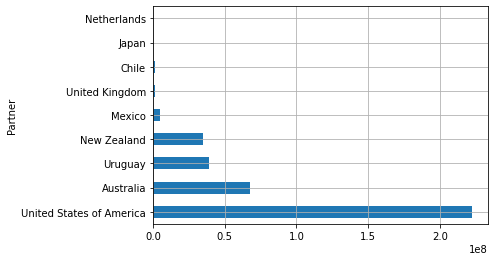

In [8]:
totalImports.head(10).plot(kind='barh')

In [9]:
exports = meat[meat[FLOW] == 'Exports']
grouped = exports.groupby([PARTNER])
print('The Canada exports to', len(grouped), 'countries.')
print('The 5 biggest importers from the Canada are:')
grouped[VALUE].aggregate(sum).sort_values(ascending=False,inplace=False).head()

The Canada exports to 24 countries.
The 5 biggest importers from the Canada are:


Partner
United States of America    449581670
China, Hong Kong SAR         35348490
Mexico                       24264793
Japan                        19422158
China                        15049276
Name: Trade Value (US$), dtype: int64

In [10]:
def buysEveryMonth(group):
    return len(group) == 10

grouped = exports.groupby([PARTNER])
regular = grouped.filter(buysEveryMonth)
regular[(regular[MONTH] == 201601) & (regular[COMMODITY] == 'Frozen')]

,Period,Partner,Trade Flow,Meat of bovine animals,Trade Value (US$)
160,201601,Mexico,Exports,Frozen,99010
193,201601,Japan,Exports,Frozen,621411
204,201601,France,Exports,Frozen,19919
209,201601,"China, Hong Kong SAR",Exports,Frozen,5230555
211,201601,Saudi Arabia,Exports,Frozen,1366137
213,201601,Switzerland,Exports,Frozen,17402
214,201601,United States of America,Exports,Frozen,2718128


In [11]:
regular[VALUE].sum() / exports[VALUE].sum()

0.943357501588932

In [12]:
meat = pd.read_csv(location, dtype={'Commodity Code':str, 'Reporter Code':str})
meat.head(3)

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,HS,2016,201604,April 2016,4,0,1,Imports,124,Canada,...,NaN,NaN,NaN,NaN,321275,NaN,2768345,NaN,NaN,0
1,HS,2016,201604,April 2016,4,0,1,Imports,124,Canada,...,NaN,NaN,NaN,NaN,9782,NaN,93683,NaN,NaN,0
2,HS,2016,201604,April 2016,4,0,1,Imports,124,Canada,...,NaN,NaN,NaN,NaN,120367,NaN,935287,NaN,NaN,0


In [13]:
COLUMNS = ['Year', 'Period','Trade Flow','Reporter', 'Partner', 'Commodity','Commodity Code','Trade Value (US$)']
meat = meat[COLUMNS]

In [14]:
meat_world = meat[meat['Partner'] == 'World']
meat_countries = meat[meat['Partner'] != 'World']

In [15]:
meat_countries.to_csv('countrymeat.csv', index=False)

In [16]:
load_test = pd.read_csv('countrymeat.csv', dtype={'Commodity Code':str, 'Reporter Code':str})
load_test.head(2)

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
0,2016,201604,Imports,Canada,Australia,Meat of bovine animals; fresh or chilled,0201,2768345
1,2016,201604,Imports,Canada,Japan,Meat of bovine animals; fresh or chilled,0201,93683


In [17]:
meat_imports = meat[meat['Trade Flow'] == 'Imports']
meat_countries_imports = meat_countries[meat_countries['Trade Flow'] == 'Imports']
meat_world_imports=meat_world[meat_world['Trade Flow'] == 'Imports']

In [18]:
meatImportsInJanuary2014 = meat_countries_imports[meat_countries_imports['Period'] == 201401]
meatImportsInJanuary2014.sort_values('Trade Value (US$)',ascending=False).head(10)

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)


In [19]:
groups = meat_countries.groupby('Trade Flow')

In [20]:
groups.get_group('Imports').head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
0,2016,201604,Imports,Canada,Australia,Meat of bovine animals; fresh or chilled,0201,2768345
1,2016,201604,Imports,Canada,Japan,Meat of bovine animals; fresh or chilled,0201,93683
2,2016,201604,Imports,Canada,Mexico,Meat of bovine animals; fresh or chilled,0201,935287
3,2016,201604,Imports,Canada,Netherlands,Meat of bovine animals; fresh or chilled,0201,2529
4,2016,201604,Imports,Canada,New Zealand,Meat of bovine animals; fresh or chilled,0201,359531


In [21]:
GROUPING_COMMFLOW = ['Commodity Code','Trade Flow']

groups = meat_countries.groupby(GROUPING_COMMFLOW)
groups.groups.keys()

dict_keys([('0201', 'Exports'), ('0201', 'Imports'), ('0202', 'Exports'), ('0202', 'Imports')])

In [22]:
GROUPING_PARTNERFLOW = ['Partner','Trade Flow']
groups = meat_countries.groupby(GROUPING_PARTNERFLOW)

GROUP_PARTNERFLOW= ('Japan','Imports')
groups.get_group( GROUP_PARTNERFLOW )

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
1,2016,201604,Imports,Canada,Japan,Meat of bovine animals; fresh or chilled,0201,93683
49,2016,201603,Imports,Canada,Japan,Meat of bovine animals; fresh or chilled,0201,136195
71,2016,201601,Imports,Canada,Japan,Meat of bovine animals; fresh or chilled,0201,25751
90,2016,201605,Imports,Canada,Japan,Meat of bovine animals; fresh or chilled,0201,38895
94,2016,201602,Imports,Canada,Japan,Meat of bovine animals; fresh or chilled,0201,57674


In [23]:
groups = meat_countries.groupby(['Commodity Code'])
groups.get_group('0202').sort_values("Trade Value (US$)", ascending=False).head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
190,2016,201601,Imports,Canada,Australia,Meat of bovine animals; frozen,0202,19252185
151,2016,201603,Imports,Canada,Uruguay,Meat of bovine animals; frozen,0202,12711802
110,2016,201604,Imports,Canada,Australia,Meat of bovine animals; frozen,0202,11963213
206,2016,201601,Imports,Canada,Uruguay,Meat of bovine animals; frozen,0202,10776839
198,2016,201602,Imports,Canada,Australia,Meat of bovine animals; frozen,0202,10194205


In [24]:
meat_world_imports.groupby('Commodity Code')['Trade Value (US$)'].aggregate(sum)

Commodity Code
0201    224999618
0202    147230768
Name: Trade Value (US$), dtype: int64

In [25]:
meat_imports_grouped=meat_countries_imports.groupby('Commodity Code')
meat_imports_grouped['Trade Value (US$)'].aggregate(sum)

Commodity Code
0201    224999620
0202    147230768
Name: Trade Value (US$), dtype: int64

In [26]:
meat_countries_imports_totals=meat_countries_imports.groupby('Partner')[['Trade Value (US$)']].aggregate(sum)
meat_countries_imports_totals.sort_values('Trade Value (US$)', ascending=False).head()

,Trade Value (US$)
Partner,
United States of America,222274225
Australia,67762173
Uruguay,39102881
New Zealand,35145431
Mexico,4738300


<AxesSubplot:ylabel='Commodity Code'>

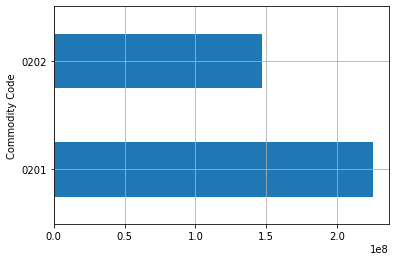

In [27]:
meat_imports_grouped['Trade Value (US$)'].aggregate(sum).plot(kind='barh')

In [28]:
monthlies=meat_countries_imports.groupby(['Commodity','Trade Flow','Period'])['Trade Value (US$)'].aggregate(sum)
monthlies

Commodity                                 Trade Flow  Period
Meat of bovine animals; fresh or chilled  Imports     201601    39854643
                                                      201602    38034069
                                                      201603    39750225
                                                      201604    44049422
                                                      201605    63311261
Meat of bovine animals; frozen            Imports     201601    42167377
                                                      201602    29334349
                                                      201603    30336781
                                                      201604    26201665
                                                      201605    19190596
Name: Trade Value (US$), dtype: int64

In [29]:
from numpy import mean

GROUPING_COMMFLOWPERIOD=['Commodity','Trade Flow','Period']
meat_countries.groupby(GROUPING_COMMFLOWPERIOD)['Trade Value (US$)'].aggregate([sum, min, max, mean])

sum  \
Commodity                                Trade Flow Period              
Meat of bovine animals; fresh or chilled Exports    201601   86232462   
                                                    201602   87212654   
                                                    201603  100643769   
                                                    201604  104919094   
                                                    201605   92976060   
                                         Imports    201601   39854643   
                                                    201602   38034069   
                                                    201603   39750225   
                                                    201604   44049422   
                                                    201605   63311261   
Meat of bovine animals; frozen           Exports    201601   19929358   
                                                    201602   18303786   
                                                    201603   17985986   
                                                    201604   21829612   
                                                    201605   20814514   
                                         Imports    201601   42167377   
                                                    201602   29334349   
                                                    201603   30336781   
                                                    201604   26201665   
                                                    201605   19190596   

                                                                min       max  \
Commodity                                Trade Flow Period                      
Meat of bovine animals; fresh or chilled Exports    201601     9744  80606415   
                                                    201602      686  79140022   
                                                    201603     9312  92671283   
                                                    201604     2092  95952415   
                                                    201605     1325  84978984   
                                         Imports    201601    25751  36993882   
                                                    201602    57674  35127202   
                                                    201603   136195  35708756   
                                                    201604     2529  39635218   
                                                    201605     5468  59330853   
Meat of bovine animals; frozen           Exports    201601     7438   9094301   
                                                    201602       86   6499142   
                                                    201603     9953   7293030   
                                                    201604      358   7764634   
                                                    201605    12327   7068958   
                                         Imports    201601    26476  19252185   
                                                    201602    22160  10194205   
                                                    201603    15373  12711802   
                                                    201604   202494  11963213   
                                                    201605  1227040   7532972   

                                                                    mean  
Commodity                                Trade Flow Period                
Meat of bovine animals; fresh or chilled Exports    201601  6.633266e+06  
                                                    201602  5.130156e+06  
                                                    201603  8.386981e+06  
                                                    201604  8.743258e+06  
                                                    201605  7.748005e+06  
                                         Imports    201601  6.642440e+06  
                                                    201602  6.339012e+06  
 

<AxesSubplot:ylabel='Commodity Code,Period'>

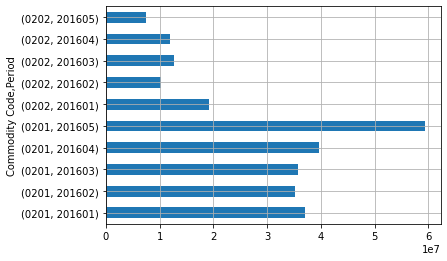

In [30]:
meat_countries_imports.groupby(['Commodity Code','Period'])['Trade Value (US$)'].aggregate(max).plot(kind='barh')

In [31]:
meat_bypartner_total=meat[meat["Trade Flow"]=='Imports'].groupby(['Partner'])['Trade Value (US$)'].aggregate(sum)
meat_bypartner_total.head(5)

Partner
Australia      67762173
Chile           1134827
Japan            352198
Mexico          4738300
Netherlands        7997
Name: Trade Value (US$), dtype: int64

<AxesSubplot:ylabel='Partner'>

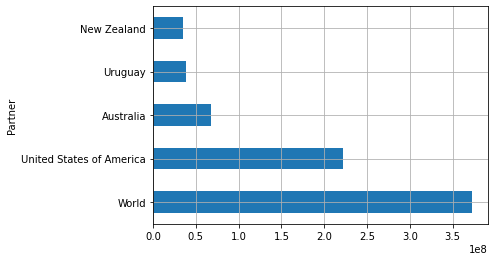

In [32]:
meat_bypartner_total.sort_values(ascending=False, inplace=False).head(5).plot(kind='barh')

In [34]:
data=[['A',10],['A',15],['A',5],['A',20],
['B',10],['B',10],['B',5],
['C',20],['C',30]]

df = pd.DataFrame(data=data, columns=["Commodity","Amount"])
df

,Commodity,Amount
0,A,10
1,A,15
2,A,5
3,A,20
4,B,10
5,B,10
6,B,5
7,C,20
8,C,30


In [35]:
grouped = df.groupby('Commodity')
grouped.aggregate(len)

,Amount
Commodity,
A,4
B,3
C,2


In [36]:
def groupsOfAtMostThreeRows(g):
    return len(g) <= 3
grouped.filter(groupsOfAtMostThreeRows)

,Commodity,Amount
4,B,10
5,B,10
6,B,5
7,C,20
8,C,30


In [37]:
grouped.aggregate(sum)

,Amount
Commodity,
A,50
B,25
C,50


In [38]:
def groupsWithImportsOver25million(g):
    return g['Trade Value (US$)'].sum() > 25000000

rows=meat_countries_imports.groupby(['Commodity','Partner']).filter(groupsWithImportsOver25million)

In [39]:
rows.groupby(['Commodity','Partner'])['Trade Value (US$)'].aggregate(sum)

Commodity                                 Partner                 
Meat of bovine animals; fresh or chilled  United States of America    206795911
Meat of bovine animals; frozen            Australia                    57559200
                                          New Zealand                  33260587
                                          Uruguay                      39102881
Name: Trade Value (US$), dtype: int64

In [40]:
def weakpartner(g):
    return len(g)<=3 | g['Trade Value (US$)'].sum()<25000

weak_meat_countries_imports=meat_countries_imports.groupby(['Commodity','Partner']).filter(weakpartner)
weak_meat_countries_imports.groupby(['Commodity','Partner'])[['Trade Value (US$)']].aggregate([len,sum])

Trade Value (US$)      
                                                                   len   sum
Commodity                                Partner                            
Meat of bovine animals; fresh or chilled Netherlands                 2  7997

In [41]:
KEYPARTNERS = ['Japan','China','Mexico','United States of America','China, Hong Kong SAR','Denmark']
meat_keypartners = meat_countries[meat_countries['Partner'].isin(KEYPARTNERS)]

pd.pivot_table(meat_keypartners,
               index=['Year','Partner','Trade Flow','Commodity'],
               values='Trade Value (US$)',
               aggfunc=sum)

Trade Value (US$)
Year Partner                  Trade Flow Commodity                                                  
2016 China                    Exports    Meat of bovine animals; fresh or chilled              95147
                                         Meat of bovine animals; frozen                     14954129
     China, Hong Kong SAR     Exports    Meat of bovine animals; fresh or chilled            1492171
                                         Meat of bovine animals; frozen                     33856319
     Japan                    Exports    Meat of bovine animals; fresh or chilled            6955217
                                         Meat of bovine animals; frozen                     12466941
                              Imports    Meat of bovine animals; fresh or chilled             352198
     Mexico                   Exports    Meat of bovine animals; fresh or chilled           23564905
                                         Meat of bovine animals; frozen                       699888
                              Imports    Meat of bovine animals; fresh or chilled            4107350
                                         Meat of bovine animals; frozen                       630950
     United States of America Exports    Meat of bovine animals; fresh or chilled          433349119
                                         Meat of bovine animals; frozen                     16232551
                              Imports    Meat of bovine animals; fresh or chilled          206795911
                                         Meat of bovine animals; frozen                     15478314

In [42]:

report = pd.pivot_table(meat_keypartners,
               index=['Year','Partner','Commodity'],
               columns='Trade Flow',
               values='Trade Value (US$)',
               aggfunc=sum)


report.sort_values('Imports', ascending=False)

Trade Flow                                                                  Exports  \
Year Partner                  Commodity                                               
2016 United States of America Meat of bovine animals; fresh or chilled  433349119.0   
                              Meat of bovine animals; frozen             16232551.0   
     Mexico                   Meat of bovine animals; fresh or chilled   23564905.0   
                              Meat of bovine animals; frozen               699888.0   
     Japan                    Meat of bovine animals; fresh or chilled    6955217.0   
     China                    Meat of bovine animals; fresh or chilled      95147.0   
                              Meat of bovine animals; frozen             14954129.0   
     China, Hong Kong SAR     Meat of bovine animals; fresh or chilled    1492171.0   
                              Meat of bovine animals; frozen             33856319.0   
     Japan                    Meat of bovine animals; frozen             12466941.0   

Trade Flow                                                                  Imports  
Year Partner                  Commodity                                              
2016 United States of America Meat of bovine animals; fresh or chilled  206795911.0  
                              Meat of bovine animals; frozen             15478314.0  
     Mexico                   Meat of bovine animals; fresh or chilled    4107350.0  
                              Meat of bovine animals; frozen               630950.0  
     Japan                    Meat of bovine animals; fresh or chilled     352198.0  
     China                    Meat of bovine animals; fresh or chilled          NaN  
                              Meat of bovine animals; frozen                    NaN  
     China, Hong Kong SAR     Meat of bovine animals; fresh or chilled          NaN  
                              Meat of bovine animals; frozen                    NaN  
     Japan                    Meat of bovine animals; frozen                    NaN

<AxesSubplot:ylabel='Year,Partner,Commodity'>

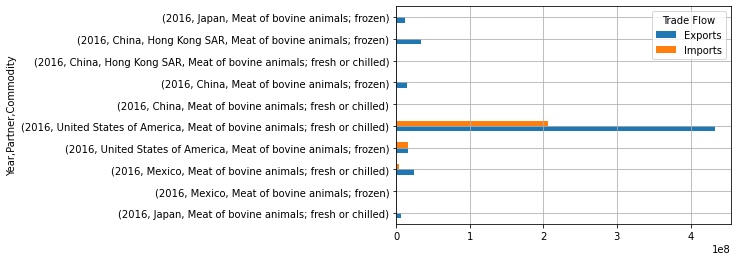

In [43]:
report.sort_values('Imports').plot(kind='barh')

In [44]:
countries = pd.pivot_table(meat, index=[PARTNER], columns=[FLOW], 
                        values=VALUE, aggfunc=sum)
countries.head()

Trade Flow,Exports,Imports
Partner,,
Australia,NaN,67762173.0
Barbados,43953.0,NaN
Chile,1093401.0,1134827.0
China,15049276.0,NaN
"China, Hong Kong SAR",35348490.0,NaN


In [45]:
countries.dropna()

Trade Flow,Exports,Imports
Partner,,
Chile,1093401.0,1134827.0
Japan,19422158.0,352198.0
Mexico,24264793.0,4738300.0
Netherlands,736404.0,7997.0
United States of America,449581670.0,222274225.0
Uruguay,24770.0,39102881.0
World,570847293.0,372230386.0
